<a href="https://colab.research.google.com/github/VicenteFran19/practica_py/blob/main/analisis%20corr%2001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UPC - Data Mining & Data Analysis

## Sesión 06

###  Ejercicio 01

Importando Libreria

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.linear_model import LogisticRegression

Importar datos

In [ ]:
data = pd.read_excel('/content/EjerciciosS06.xlsx',sheet_name='RLM01')
data

,year,mileage,tax,mpg,engineSize,price
0,2016,24089,265,36.2,2.0,16000
1,2017,18615,145,36.2,2.0,15995
2,2015,27469,265,36.2,2.0,13998
3,2017,14736,150,36.2,2.0,18998
4,2017,36284,145,36.2,2.0,17498
...,...,...,...,...,...,...
6733,2011,30000,20,58.9,1.0,5500
6734,2011,36154,125,50.4,1.3,4985
6735,2012,46000,125,57.6,1.4,4995
6736,2011,60700,125,50.4,1.3,3995


<Axes: >

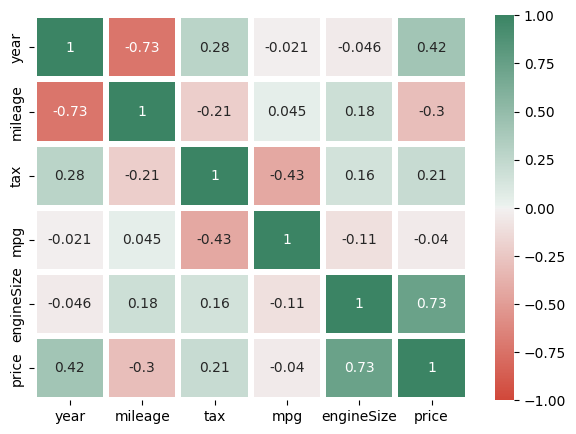

In [ ]:
# Analisis de Correlacion
plt.figure(figsize = (7, 5))
sns.heatmap(data.corr(),
            linewidths = 3,
            cmap = sns.diverging_palette(15, 150, as_cmap=True),
            vmin = -1, vmax = 1, annot = True)

In [ ]:
# Analisis de Regresion

In [ ]:
# Preparando la data
X = data.drop(columns=['price'])
y = data[['price']]

In [ ]:
# modelo v1
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     4353.
Date:                Sat, 07 Dec 2024   Prob (F-statistic):               0.00
Time:                        00:46:21   Log-Likelihood:                -63693.
No. Observations:                6738   AIC:                         1.274e+05
Df Residuals:                    6732   BIC:                         1.274e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.688e+06   5.18e+04    -32.607      0.0

In [ ]:
# Modelo v2: eliminando mileage
X = X.drop(columns=['mileage'])

model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     4758.
Date:                Sat, 07 Dec 2024   Prob (F-statistic):               0.00
Time:                        00:48:50   Log-Likelihood:                -64033.
No. Observations:                6738   AIC:                         1.281e+05
Df Residuals:                    6733   BIC:                         1.281e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.678e+06   3.81e+04    -70.276      0.0

In [ ]:
# GGenerando muestras train test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     3793.
Date:                Sat, 07 Dec 2024   Prob (F-statistic):               0.00
Time:                        00:58:27   Log-Likelihood:                -51241.
No. Observations:                5390   AIC:                         1.025e+05
Df Residuals:                    5385   BIC:                         1.025e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.715e+06   4.29e+04    -63.322      0.0

Ejercicio 02

In [ ]:
data = pd.read_excel('/content/EjerciciosS06.xlsx',sheet_name='RLM02')
data

,Age,DistanceFromHome,NumCompaniesWorked,PercentSalaryHike,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome,TotalWorkingYears
0,47,1,1,11,4,10,9,9,57620,10
1,42,2,5,13,2,20,4,8,29560,23
2,27,2,0,17,3,5,1,4,168230,6
3,21,9,1,12,5,3,1,2,178750,3
4,37,5,6,19,3,5,0,3,21440,17
...,...,...,...,...,...,...,...,...,...,...
295,55,6,8,17,0,24,2,15,26550,36
296,34,7,1,23,2,5,2,0,29740,5
297,29,2,0,13,3,6,1,5,49780,7
298,37,2,4,19,2,9,5,8,97560,13


<Axes: >

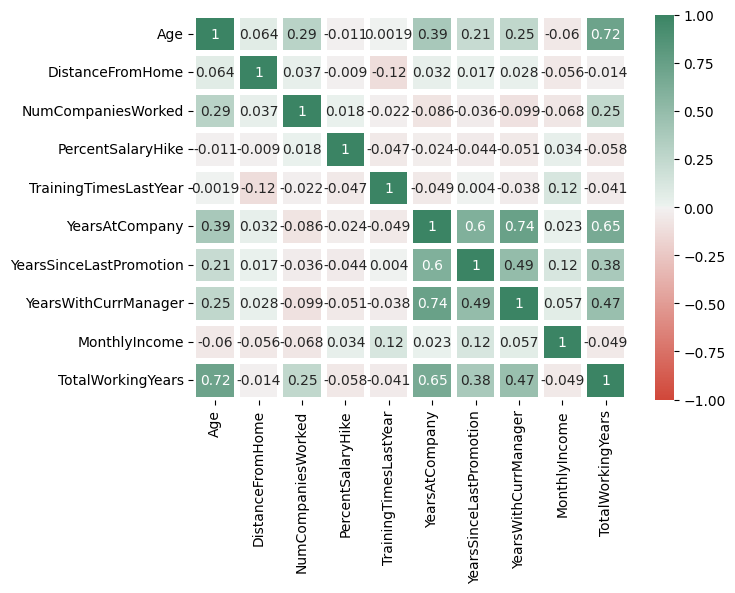

In [ ]:
# Analkisis de Correlacion
plt.figure(figsize = (7, 5))
sns.heatmap(data.corr(),
            linewidths = 3,
            cmap = sns.diverging_palette(15, 150, as_cmap=True),
            vmin = -1, vmax = 1, annot = True)

In [ ]:
X = data.drop(columns=['TotalWorkingYears'])
y = data[['TotalWorkingYears']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      TotalWorkingYears   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     54.31
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           4.83e-52
Time:                        01:06:25   Log-Likelihood:                -696.07
No. Observations:                 240   AIC:                             1412.
Df Residuals:                     230   BIC:                             1447.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
X_train = X_train.drop(columns=['PercentSalaryHike','TrainingTimesLastYear','YearsSinceLastPromotion','YearsWithCurrManager','MonthlyIncome'])

model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      TotalWorkingYears   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     121.8
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           4.12e-56
Time:                        01:08:31   Log-Likelihood:                -698.09
No. Observations:                 240   AIC:                             1406.
Df Residuals:                     235   BIC:                             1424.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -8.3962      1

In [ ]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.05,
                       threshold_out=0.05,
                       verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Add  {best_feature:30} with p-value {best_pval:.6}')

        # Backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Remove {worst_feature:30} with p-value {worst_pval:.6}')
        if not changed:
            break
    return included

In [ ]:
# Volviendo a hacer el modelo utilizando stepwise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
result = stepwise_selection(X_train, y_train)
print('Resulting features:')
print(result)

Add  Age                            with p-value 7.35864e-45
Add  YearsAtCompany                 with p-value 1.25579e-21
Add  NumCompaniesWorked             with p-value 0.00570001
Add  DistanceFromHome               with p-value 0.00504727
Resulting features:
['Age', 'YearsAtCompany', 'NumCompaniesWorked', 'DistanceFromHome']


In [ ]:
result

['Age', 'YearsAtCompany', 'NumCompaniesWorked', 'DistanceFromHome']

In [ ]:
model = sm.OLS(y_train, sm.add_constant(X_train[result])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      TotalWorkingYears   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     153.2
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           2.81e-64
Time:                        01:17:39   Log-Likelihood:                -680.35
No. Observations:                 240   AIC:                             1371.
Df Residuals:                     235   BIC:                             1388.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -8.9767      1

Ejercicio 03

In [ ]:
data = pd.read_excel('/content/EjerciciosS06.xlsx',sheet_name='RLM03')
data

,Deuda_Promedio,Deuda_Maxima,Cuota_Promedio,Deuda_Maxima_ProdCP,Cuota_Promedio_ProdCP,Linea_Competencia,Linea_Entidad,Ingreso_ENAHO
0,35268.820,36000.00,811.210,37700,900,0.000,1825.00,1388
1,34161.825,38853.43,936.200,37700,1000,24122.850,18400.00,4208
2,29165.660,32497.87,3135.625,28900,2700,1299.605,3200.00,3436
3,23791.510,53952.54,1585.960,51400,1500,14900.000,6000.00,2408
4,29498.510,37272.20,1541.120,37700,1500,0.000,10512.50,1662
...,...,...,...,...,...,...,...,...
6156,120285.765,123214.81,1706.000,179900,1900,25293.575,9800.00,6590
6157,3215.750,40749.90,2035.075,37700,1900,15164.405,4550.00,1724
6158,37052.205,43290.24,9731.910,37700,5600,61932.240,39584.83,6811
6159,22591.385,50975.45,2302.480,51400,2700,37400.000,30987.12,4713


In [ ]:
X = data.drop(columns=['Ingreso_ENAHO'])
y = data[['Ingreso_ENAHO']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
result = stepwise_selection(X_train, y_train)
print('Resulting features:')
print(result)

Add  Linea_Competencia              with p-value 0.0
Add  Linea_Entidad                  with p-value 0.0
Add  Deuda_Maxima_ProdCP            with p-value 8.00435e-118
Add  Cuota_Promedio_ProdCP          with p-value 1.93998e-05
Remove Linea_Competencia              with p-value 0.167012
Resulting features:
['Linea_Entidad', 'Deuda_Maxima_ProdCP', 'Cuota_Promedio_ProdCP']


In [ ]:
model = sm.OLS(y_train, sm.add_constant(X_train[result])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Ingreso_ENAHO   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3002.
Date:                Sat, 07 Dec 2024   Prob (F-statistic):               0.00
Time:                        01:36:06   Log-Likelihood:                -42565.
No. Observations:                4928   AIC:                         8.514e+04
Df Residuals:                    4924   BIC:                         8.516e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1750.79

Ejercicio 04

In [ ]:
data = pd.read_excel('/content/EjerciciosS06.xlsx',sheet_name='RLM04')
data

,Region,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Bedrooms,Avg. Area Number of Rooms,Area Population,Price
0,South-West,79545.458574,5.682861,4.09,7.009188,23086.800503,1.059034e+06
1,South-West,79248.642455,6.002900,3.09,6.730821,40173.072174,1.505891e+06
2,North-West,61287.067179,5.865890,5.13,8.512727,36882.159400,1.058988e+06
3,North-West,63345.240046,7.188236,3.26,5.586729,34310.242831,1.260617e+06
4,North-West,59982.197226,5.040555,4.23,7.839388,26354.109472,6.309435e+05
...,...,...,...,...,...,...,...
4995,South-West,60567.944140,7.830362,3.46,6.137356,22837.361035,1.060194e+06
4996,South-West,78491.275435,6.999135,4.02,6.576763,25616.115489,1.482618e+06
4997,North-West,63390.686886,7.250591,2.13,4.805081,33266.145490,1.030730e+06
4998,North-West,68001.331235,5.534388,5.44,7.130144,42625.620156,1.198657e+06


In [ ]:
data.Region.value_counts()

,count
Region,
South-West,2012
North-West,1514
North-East,1474


In [ ]:
data[['Region','Price']].groupby('Region').describe()/1000

Price                                                     \
            count         mean         std          min          25%   
Region                                                                 
North-East  1.474  1050.223508  400.740625    31.140518   770.828458   
North-West  1.514  1072.546183  187.144234    15.938658  1020.927673   
South-West  2.012  1485.337425  241.682415  1010.477392  1331.837216   

                                                   
                    50%          75%          max  
Region                                             
North-East   936.939635  1396.201487  2298.379487  
North-West  1113.715169  1205.624514  1289.201391  
South-West  1459.532754  1626.664092  2469.065594

In [ ]:
# Regresion
X = data.drop(columns=['Price'])
y = data[['Price']]

In [ ]:
X = pd.get_dummies(X, columns=['Region'], drop_first=True, dtype=int)

In [ ]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Bedrooms,Avg. Area Number of Rooms,Area Population,Region_North-West,Region_South-West
0,79545.458574,5.682861,4.09,7.009188,23086.800503,0,1
1,79248.642455,6.002900,3.09,6.730821,40173.072174,0,1
2,61287.067179,5.865890,5.13,8.512727,36882.159400,1,0
3,63345.240046,7.188236,3.26,5.586729,34310.242831,1,0
4,59982.197226,5.040555,4.23,7.839388,26354.109472,1,0
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,3.46,6.137356,22837.361035,0,1
4996,78491.275435,6.999135,4.02,6.576763,25616.115489,0,1
4997,63390.686886,7.250591,2.13,4.805081,33266.145490,1,0
4998,68001.331235,5.534388,5.44,7.130144,42625.620156,1,0


In [ ]:
result = stepwise_selection(X, y)
print('Resulting features:')
print(result)

Add  Region_South-West              with p-value 0.0
Add  Avg. Area Income               with p-value 0.0
Add  Avg. Area House Age            with p-value 0.0
Add  Avg. Area Number of Rooms      with p-value 0.0
Add  Area Population                with p-value 0.0
Resulting features:
['Region_South-West', 'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']


In [ ]:
model = sm.OLS(y, sm.add_constant(X[result])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 1.160e+04
Date:                Sat, 07 Dec 2024   Prob (F-statistic):               0.00
Time:                        01:59:21   Log-Likelihood:                -64631.
No. Observations:                5000   AIC:                         1.293e+05
Df Residuals:                    4994   BIC:                         1.293e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Ejercicio 05

In [ ]:
data = pd.read_excel('/content/EjerciciosS06.xlsx',sheet_name='RLM05')
data

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Frequency (GHz),CPU_Type,RAM (GB),Memory,MemoryGB,GPU_Company,GPU_Type,OpSys,OS,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,2.3,Core i5,8,128GB SSD,128,Intel,Iris Plus Graphics 640,macOS,Mac OS X,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,1.8,Core i5,8,128GB Flash Storage,128,Intel,HD Graphics 6000,macOS,Mac OS X,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,2.5,Core i5 7200U,8,256GB SSD,256,Intel,HD Graphics 620,No OS,Other,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,2.7,Core i7,16,512GB SSD,512,AMD,Radeon Pro 455,macOS,Mac OS X,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,3.1,Core i5,8,256GB SSD,256,Intel,Iris Plus Graphics 650,macOS,Mac OS X,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,2.5,Core i7 6500U,4,128GB SSD,128,Intel,HD Graphics 520,Windows 10,Windows,1.80,638.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,2.5,Core i7 6500U,16,512GB SSD,512,Intel,HD Graphics 520,Windows 10,Windows,1.30,1499.00
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,1.6,Celeron Dual Core N3050,2,64GB Flash Storage,64,Intel,HD Graphics,Windows 10,Windows,1.50,229.00
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,2.5,Core i7 6500U,6,1TB HDD,1024,AMD,Radeon R5 M330,Windows 10,Windows,2.19,764.00


In [ ]:
# Regresion
X = data[['Inches','CPU_Frequency (GHz)','RAM (GB)','MemoryGB','Weight (kg)']]
y = data[['Price (Euro)']]

In [ ]:
result = stepwise_selection(X, y)
print('Resulting features:')
print(result)

Add  RAM (GB)                       with p-value 9.13291e-222
Add  CPU_Frequency (GHz)            with p-value 6.37514e-20
Add  Inches                         with p-value 3.90738e-19
Add  MemoryGB                       with p-value 1.09043e-09
Resulting features:
['RAM (GB)', 'CPU_Frequency (GHz)', 'Inches', 'MemoryGB']


In [ ]:
model = sm.OLS(y, sm.add_constant(X[result])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Price (Euro)   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     505.1
Date:                Sat, 07 Dec 2024   Prob (F-statistic):          1.15e-260
Time:                        02:13:39   Log-Likelihood:                -9555.8
No. Observations:                1275   AIC:                         1.912e+04
Df Residuals:                    1270   BIC:                         1.915e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 735.6859    

In [ ]:
# Agregando Variables Categoricas

In [ ]:
# OS
data[['OS','Price (Euro)']].groupby('OS').describe()

Price (Euro)                                                    \
                count         mean         std     min     25%      50%   
OS                                                                        
Mac OS X         21.0  1564.198571  561.623595  898.94  1163.0  1339.69   
Other           153.0   592.740719  309.014371  174.00   367.0   499.00   
Windows        1101.0  1202.132652  707.724062  191.90   684.8  1064.00   

                           
              75%     max  
OS                         
Mac OS X  1958.90  2858.0  
Other      749.01  2199.0  
Windows   1579.00  6099.0

In [ ]:
X = data[['Inches','CPU_Frequency (GHz)','RAM (GB)','MemoryGB','OS']]

X = pd.get_dummies(X, columns=['OS'], drop_first=True, dtype=int)

model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Price (Euro)   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     360.0
Date:                Sat, 07 Dec 2024   Prob (F-statistic):          1.22e-269
Time:                        02:15:33   Log-Likelihood:                -9528.7
No. Observations:                1275   AIC:                         1.907e+04
Df Residuals:                    1268   BIC:                         1.911e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 988.0813    

In [ ]:
# CPU_Company
data[['CPU_Company','Price (Euro)']].groupby('CPU_Company').describe()

Price (Euro)                                                    \
                   count         mean         std    min     25%       50%   
CPU_Company                                                                  
AMD                 60.0   560.993833  350.347274  199.0  397.25   469.000   
Intel             1214.0  1163.728929  701.760536  174.0  649.00  1014.495   
Samsung              1.0   659.000000         NaN  659.0  659.00   659.000   

                             
                75%     max  
CPU_Company                  
AMD           576.0  2199.0  
Intel        1499.0  6099.0  
Samsung       659.0   659.0

In [ ]:
data = data[(data['CPU_Company']!='Samsung')]

In [ ]:
X = data[['Inches','CPU_Frequency (GHz)','RAM (GB)','MemoryGB','OS','CPU_Company']]
y = data[['Price (Euro)']]

X = pd.get_dummies(X, columns=['OS'], drop_first=True, dtype=int)
X = pd.get_dummies(X, columns=['CPU_Company'], drop_first=True, dtype=int)

In [ ]:
X

,Inches,CPU_Frequency (GHz),RAM (GB),MemoryGB,OS_Other,OS_Windows,CPU_Company_Intel
0,13.3,2.3,8,128,0,0,1
1,13.3,1.8,8,128,0,0,1
2,15.6,2.5,8,256,1,0,1
3,15.4,2.7,16,512,0,0,1
4,13.3,3.1,8,256,0,0,1
...,...,...,...,...,...,...,...
1270,14.0,2.5,4,128,0,1,1
1271,13.3,2.5,16,512,0,1,1
1272,14.0,1.6,2,64,0,1,1
1273,15.6,2.5,6,1024,0,1,1


In [ ]:
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Price (Euro)   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     328.8
Date:                Sat, 07 Dec 2024   Prob (F-statistic):          1.52e-279
Time:                        02:21:02   Log-Likelihood:                -9495.0
No. Observations:                1274   AIC:                         1.901e+04
Df Residuals:                    1266   BIC:                         1.905e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 442.2655    

Regresion Logistica

In [ ]:
data = pd.read_excel('/content/EjerciciosS06.xlsx',sheet_name='RNL01')
data

,N_Lineas,Recibo_Prom,Antig_Laboral,Ingreso,Churn
0,2,29,2,1146,1
1,4,45,2,1158,0
2,1,29,2,1218,1
3,2,45,4,1272,0
4,2,59,3,1275,0
...,...,...,...,...,...
4840,1,74,5,2973,0
4841,3,39,8,2976,0
4842,2,75,5,2976,0
4843,1,89,5,2979,0


In [ ]:
# Churn
# 1 : Si anula
# 0 : No anula

In [ ]:
data.Churn.value_counts()

,count
Churn,
0,4296
1,549


In [ ]:
fig = px.pie(data, names='Churn')
fig.show()

In [ ]:
# Modelo de Regresion Logistica
X = data.drop(columns=['Churn'])
X = sm.add_constant(X)
Y = data['Churn']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
# Primera ejecución del modelo
logit_model=sm.Logit(Y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.341136
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 3876
Model:                          Logit   Df Residuals:                     3871
Method:                           MLE   Df Model:                            4
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.04997
Time:                        03:09:36   Log-Likelihood:                -1322.2
converged:                       True   LL-Null:                       -1391.8
Covariance Type:            nonrobust   LLR p-value:                 4.393e-29
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.6583      0.307      5.406      0.000       1.057       2.260
N_Lineas         -0.

In [ ]:
# Eliminando variables no significativas
X_train = X_train.drop(columns=['N_Lineas','Recibo_Prom'])

logit_model=sm.Logit(Y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.341288
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 3876
Model:                          Logit   Df Residuals:                     3873
Method:                           MLE   Df Model:                            2
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.04955
Time:                        03:09:58   Log-Likelihood:                -1322.8
converged:                       True   LL-Null:                       -1391.8
Covariance Type:            nonrobust   LLR p-value:                 1.125e-30
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.5917      0.298      5.338      0.000       1.007       2.176
Antig_Laboral    -0.

In [ ]:
logreg = LogisticRegression()
logreg.fit(X = X_train, y = Y_train)

Yprob = logreg.predict_proba(X_train)
Yprob = [i[1] for i in Yprob]

from sklearn.metrics import roc_auc_score
score = roc_auc_score(Y_train, Yprob)

print(f"ROC AUC score of the model: {np.round(score, 5)}")

ROC AUC score of the model: 0.68421


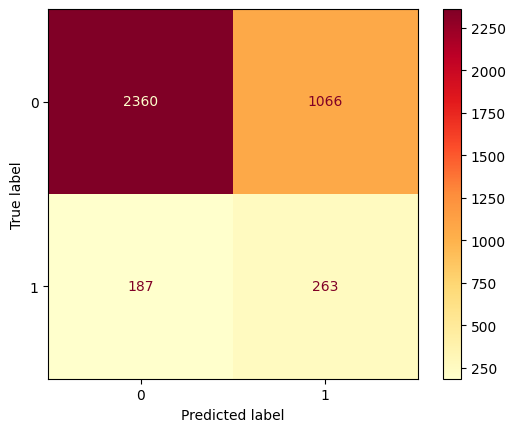

Precision : 0.19789315274642588
Recall : 0.5844444444444444
Specificity : 0.688849970811442
Accuracy : 0.6767285861713106


In [ ]:
X_train['target'] = Y_train
X_train['Yprob'] = Yprob
X_train['Ypred'] = np.where(X_train['Yprob'] > 0.113, 1, 0)

yreal = X_train['target']
ypred = X_train['Ypred']

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yreal,ypred)

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(yreal, ypred, cmap ='YlOrRd')
plt.show()

print(f"Precision : {confusion_matrix[1,1]/(confusion_matrix[0,1]+confusion_matrix[1,1])}")
print(f"Recall : {confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])}")
print(f"Specificity : {confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])}")
print(f"Accuracy : {(confusion_matrix[0,0]+confusion_matrix[1,1])/confusion_matrix.sum()}")